<a href="https://colab.research.google.com/github/kamijoseph/Face-Mask-Detection/blob/main/notebook/face_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# face mask detection modelling notebook

## dependencies

In [1]:
from zipfile import ZipFile
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf

## dataset

In [2]:
# file configuration
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# downloading dataset
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 91% 149M/163M [00:00<00:00, 1.55GB/s]
100% 163M/163M [00:00<00:00, 1.37GB/s]


In [4]:
# extracting the dataset
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print("succesfuly extracted dataset ....................")

succesfuly extracted dataset ....................


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
# masked and unmasked files
masked = os.listdir("/content/data/with_mask")
no_mask = os.listdir("/content/data/without_mask")

In [7]:
print(masked[:5])
print(masked[-5:])

['with_mask_3226.jpg', 'with_mask_1036.jpg', 'with_mask_1937.jpg', 'with_mask_2342.jpg', 'with_mask_3259.jpg']
['with_mask_441.jpg', 'with_mask_1020.jpg', 'with_mask_583.jpg', 'with_mask_2947.jpg', 'with_mask_2018.jpg']


In [8]:
print(no_mask[:5])
print(no_mask[-5:])

['without_mask_548.jpg', 'without_mask_3593.jpg', 'without_mask_3733.jpg', 'without_mask_2181.jpg', 'without_mask_2786.jpg']
['without_mask_1731.jpg', 'without_mask_2577.jpg', 'without_mask_115.jpg', 'without_mask_1979.jpg', 'without_mask_3017.jpg']


In [9]:
print("masked images", len(masked))
print("unmasked images", len(no_mask))

masked images 3725
unmasked images 3828


## exploration and preprocessing

In [10]:
# labels for masked and unmasked images
masked_labels = [1] * len(masked)
no_mask_labels = [0] * len(no_mask)

print(masked_labels[:5])
print(no_mask_labels[:5])

print(len(masked_labels))
print(len(no_mask_labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
3725
3828


In [11]:
labels = masked_labels + no_mask_labels

print(len(labels))
print(labels[:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


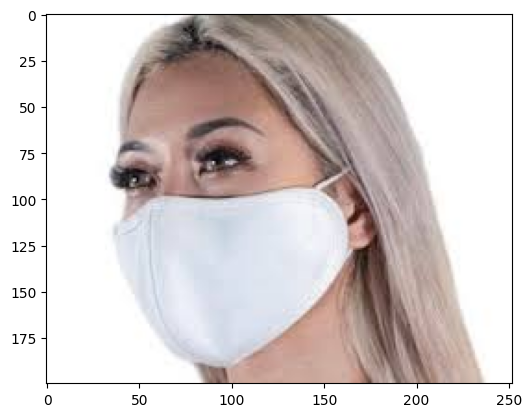

In [12]:
# dispalying sample masked image
img = mpimg.imread("/content/data/with_mask/with_mask_2295.jpg")
imgplot = plt.imshow(img)
plt.show()

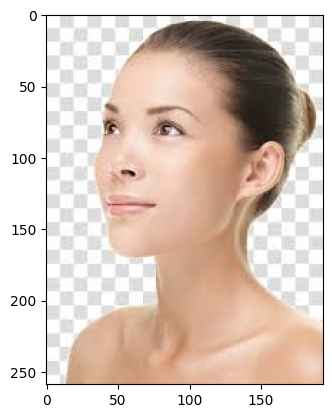

In [13]:
# dispalying sample no mask image
img = mpimg.imread("/content/data/without_mask/without_mask_2925.jpg")
imgplot = plt.imshow(img)
plt.show()

In [14]:
# converting images to numpy array
masked_path = "/content/data/with_mask/"
data = []

for img_file in masked:
  image = Image.open(masked_path + img_file)
  image = image.resize((128, 128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

no_mask_path = "/content/data/without_mask/"
for img_file in no_mask:
  image = Image.open(no_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
print(len(data))
print(type(data[0]))
print(data[0].shape)

7553
<class 'numpy.ndarray'>
(128, 128, 3)


## feature & labels selection, scaling, modelling and training

In [16]:
# converting image list and label list to numpy arrays
X, y = np.array(data), np.array(labels)

print(type(X), type(y))
print(X.shape, y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(7553, 128, 128, 3) (7553,)


In [17]:
# train test splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 21
)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(7553, 128, 128, 3)
(6042, 128, 128, 3)
(1511, 128, 128, 3)


In [18]:
# scaling the data
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### building the model

In [19]:
# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128,3)),

    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(2, activation="sigmoid")

])

In [20]:
# compiling the model
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["acc"]
)

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# training the cnn
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split = 0.1,
    epochs = 5
)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - acc: 0.6680 - loss: 0.7168 - val_acc: 0.8810 - val_loss: 0.2940
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8634 - loss: 0.3274 - val_acc: 0.8926 - val_loss: 0.2817
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8880 - loss: 0.2822 - val_acc: 0.8942 - val_loss: 0.2283
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9171 - loss: 0.2289 - val_acc: 0.8579 - val_loss: 0.2990
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9139 - loss: 0.2179 - val_acc: 0.9306 - val_loss: 0.1893


## model evaluation

In [23]:
loss, acc = model.evaluate(
    X_test,
    y_test
)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.9225 - loss: 20.5777


In [24]:
print("accuracy: ", acc)


accuracy:  0.9199205636978149


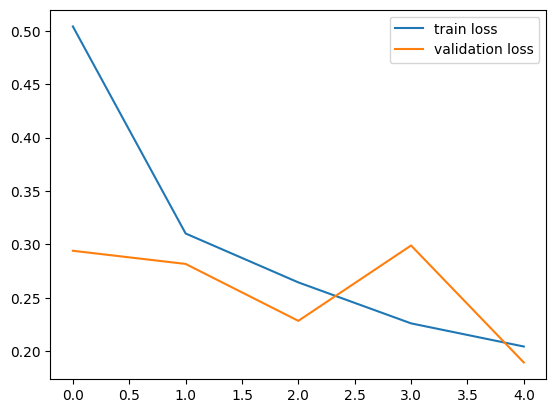

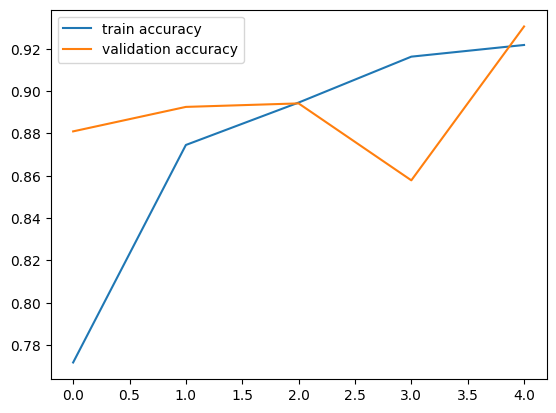

In [25]:
h = history

# loss
plt.plot(h.history["loss"], label="train loss")
plt.plot(h.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

# accuracy
plt.plot(h.history["acc"], label="train accuracy")
plt.plot(h.history["val_acc"], label="validation accuracy")
plt.legend()
plt.show()

## test system

In [ ]:
# simple predictive system